In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os,sys
from pathlib import Path

In [2]:
df=pd.read_csv(Path(os.path.join("D:/weather/notebook/Data","weather_classification_data.csv")))

In [3]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [82]:
df["Weather Type"].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [5]:
X=df.drop(columns=["Weather Type"],axis=1)

In [6]:
X.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location'],
      dtype='object')

In [7]:
y=df['Weather Type']

In [8]:
yann=df["Weather Type"]

In [9]:
numerical_columns_name=X.select_dtypes(exclude="object").columns
categorical_columns_name=X.select_dtypes(include="object").columns

In [10]:
numerical_columns_name

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')

In [11]:
categorical_columns_name

Index(['Cloud Cover', 'Season', 'Location'], dtype='object')

In [12]:
#encode the label data uses in machine learning algorithm
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)

In [15]:
yann=pd.DataFrame(yann,columns=["Weather Type"])

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
#encode the data for using neural network
ohe=OneHotEncoder(sparse_output=False)
yann=ohe.fit_transform(yann)

In [18]:
yann.shape

(13200, 4)

In [19]:
np.array(yann)

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [20]:
np.unique(y)

array([0, 1, 2, 3])

In [21]:
categorical_columns_name

Index(['Cloud Cover', 'Season', 'Location'], dtype='object')

In [22]:
X[categorical_columns_name]["Location"].unique()

array(['inland', 'mountain', 'coastal'], dtype=object)

In [23]:
# now split the data then make the pipeline for transofrm the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,yann,test_size=0.30) 

In [24]:
yann

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [25]:
X_train.shape

(9240, 10)

In [26]:
y_train.shape

(9240, 4)

In [27]:
X_test.shape

(3960, 10)

In [28]:
y_test.shape

(3960, 4)

In [29]:
#now make the pipeline for scale the data and transform the data
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [30]:
numerical_pipeline=Pipeline(
    steps=[
        ("impute",SimpleImputer(strategy="mean")),
        ("scaler",StandardScaler())
    ]
)
categorical_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("encoder",OneHotEncoder(sparse_output=False))
    ]
)

In [31]:
transformer=ColumnTransformer(
    [
        ("numberical_pipeline",numerical_pipeline,numerical_columns_name),
        ("categorical_pipeline",categorical_pipeline,categorical_columns_name)
    ]
)

In [32]:
#now fit the data
transformer.fit_transform(X_train)

array([[ 0.84637291,  1.00272657,  1.3781914 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.56287795,  0.6577166 , -0.05326924, ...,  0.        ,
         1.        ,  0.        ],
       [-1.04660991, -0.32802618, -0.69742652, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.73164667, -0.42660046, -0.12484227, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.27274175,  1.34773655,  0.73403412, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.55955733,  0.50985518,  0.66246108, ...,  0.        ,
         1.        ,  0.        ]])

In [33]:
transformer.transform(X_test)

array([[ 0.96109914, -1.26448182, -0.69742652, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.96880819,  0.16484521,  3.3822363 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.4448311 , -0.32802618, -0.26798833, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.47297875, -0.18016476, -0.76899956, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.84637291, -0.37731332, -1.19843775, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.07582537, -1.90521463, -0.55428046, ...,  0.        ,
         0.        ,  1.        ]])

In [34]:
#now we have to make the dataframe for use these encoded values
X_train=pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
X_test=pd.DataFrame(transformer.transform(X_test),columns=transformer.get_feature_names_out())


In [35]:
X_train.shape

(9240, 18)

In [36]:
X_test.shape

(3960, 18)

#now ready to train the data in a model 
#so first train by ANN (artifical neural network)
#then train by different different machine learning models(decision Tree,boosting and XGboost and RandomForest algorithms)

In [37]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [38]:
model=Sequential()
model.add(Dense(64,activation="relu",input_shape=(18,)))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="tanh"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="softmax"))
model.summary()

d:\anaconda3\envs\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,052 (19.73 KB)

 Trainable params: 5,052 (19.73 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [40]:
history=model.fit(X_train,y_train,epochs=25,validation_data=[X_test,y_test])

Epoch 1/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5928 - loss: 0.9305 - val_accuracy: 0.8949 - val_loss: 0.2762
Epoch 2/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8979 - loss: 0.2583 - val_accuracy: 0.9048 - val_loss: 0.2257
Epoch 3/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9070 - loss: 0.2174 - val_accuracy: 0.9043 - val_loss: 0.2177
Epoch 4/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9147 - loss: 0.1954 - val_accuracy: 0.9048 - val_loss: 0.2109
Epoch 5/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9170 - loss: 0.1900 - val_accuracy: 0.9063 - val_loss: 0.2117
Epoch 6/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9156 - loss: 0.1871 - val_accuracy: 0.9071 - val_loss: 0.2011
Epoch 7/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9181 - loss: 0.1824 - val_accuracy: 0.9073 - val_loss: 0.2021
Epoch 8/25
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9197 - loss: 0.1779 - val_accuracy: 0.

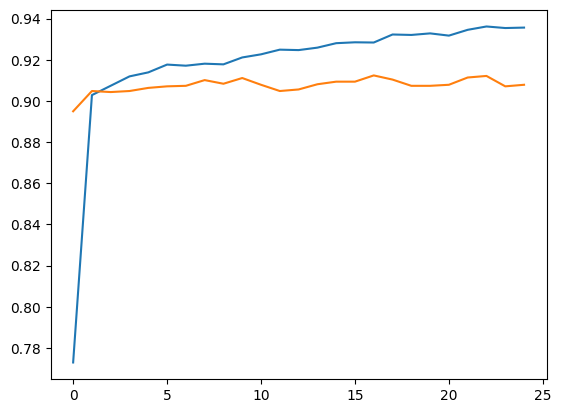

In [42]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

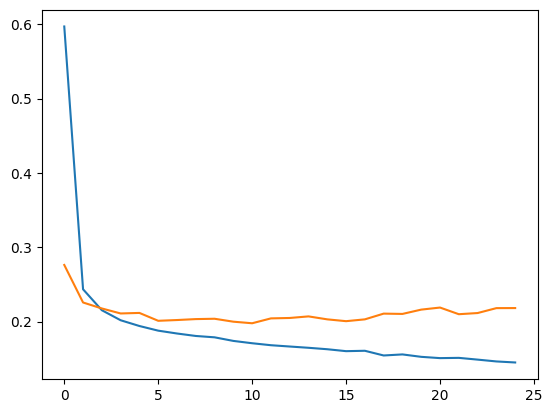

In [43]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [44]:
print(history.history["val_accuracy"])

[0.8949494957923889, 0.9047979712486267, 0.9042929410934448, 0.9047979712486267, 0.9063131213188171, 0.9070706963539124, 0.9073232412338257, 0.9101009964942932, 0.9083333611488342, 0.9111111164093018, 0.9078282713890076, 0.9047979712486267, 0.9055555462837219, 0.9080808162689209, 0.909343421459198, 0.909343421459198, 0.9123737215995789, 0.9103535413742065, 0.9073232412338257, 0.9073232412338257, 0.9078282713890076, 0.9113636612892151, 0.9121212363243103, 0.9070706963539124, 0.9078282713890076]


In [45]:
data={"Temperature":14.0,"Humidity":73,"Wind Speed":9.5,"Precipitation (%)":82.0,"Cloud Cover":"partly cloudy","Atmospheric Pressure":1010.82,"UV Index":2,"Season":"Winter","Visibility (km)":3.5,"Location":"inland"}

In [46]:
d=pd.DataFrame(data=data,index=[0])

In [49]:
from src.Utils import load_object
trans=load_object(os.path.join(r"D:\weather\artifacts\transformation.pkl"))

In [51]:
d_array=trans.transform(d)

In [66]:
model.predict(d_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[3.8958856e-04, 9.9955684e-01, 3.1847001e-05, 2.1727174e-05]],
      dtype=float32)

In [76]:
index=model.predict(d_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


In [77]:
index

array([[3.8958856e-04, 9.9955684e-01, 3.1847001e-05, 2.1727174e-05]],
      dtype=float32)

In [79]:
for a in index:
    print(a)
    a=np.argmax(a)
    print(a)

[3.8958856e-04 9.9955684e-01 3.1847001e-05 2.1727174e-05]
1


In [53]:
ohe=load_object(os.path.join(r"D:\weather\artifacts\ohe.pkl"))

In [69]:
index_number=np.argmax(index)

In [74]:
index_number_ouput=index_number.reshape(1,4)

ValueError: cannot reshape array of size 1 into shape (1,4)

In [75]:
ohe.inverse_transform(index_number_ouput)

ValueError: Shape of the passed X data is not correct. Expected 4 columns, got 1.

In [80]:
a=[0,1,2,4,1,2,0.4]
np.argmax(a)

3

In [ ]:
model.predict()

In [89]:
pip install keras-tuner --upgrade

Note: you may need to restart the kernel to use updated packages.


In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from kerastuner import RandomSearch

# Define a model-building function
def build_model(hp):
    model = Sequential()
    
    # Choose the number of layers and neurons in each layer
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int('units_' + str(i), 
                                     min_value=32, 
                                     max_value=128, 
                                     step=32),
                        activation=hp.Choice('activation_' + str(i), 
                                             values=['relu', 'tanh'])))
    
    # Output layer
    model.add(Dense(4, activation='softmax'))
    
    # Compile the model with a choice of optimizers
    model.compile(optimizer=hp.Choice('optimizer', 
                                      values=['adam', 'rmsprop']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create a RandomSearch tuner
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=10,  # Number of different models to try
                     executions_per_trial=3,  # Number of times to train each model
                     directory='my_dir',
                     project_name='ann_tuning')

# Search for the best hyperparameters
tuner.search(X_train, y_train,
             epochs=10,
             validation_data=(X_test, y_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Print the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hyperparameters.values)


Reloading Tuner from my_dir\ann_tuning\tuner0.json
{'num_layers': 2, 'units_0': 96, 'activation_0': 'relu', 'optimizer': 'adam', 'units_1': 64, 'activation_1': 'relu', 'units_2': 64, 'activation_2': 'tanh'}


d:\anaconda3\envs\env\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [92]:
best_hyperparameters.values

{'num_layers': 2,
 'units_0': 96,
 'activation_0': 'relu',
 'optimizer': 'adam',
 'units_1': 64,
 'activation_1': 'relu',
 'units_2': 64,
 'activation_2': 'tanh'}

In [86]:
y

array([1, 0, 3, ..., 0, 2, 1])

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [88]:
X_train

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
10163,24.0,75,17.5,84.0,overcast,999.76,3,Summer,5.0,mountain
12929,46.0,69,3.5,43.0,cloudy,842.22,12,Spring,5.5,inland
5735,24.0,87,18.0,65.0,partly cloudy,1011.48,1,Spring,1.5,inland
440,1.0,102,35.0,90.0,overcast,988.38,5,Winter,4.0,mountain
2018,42.0,87,17.5,100.0,partly cloudy,1016.17,8,Summer,8.0,inland
...,...,...,...,...,...,...,...,...,...,...
11964,32.0,98,5.5,89.0,overcast,1006.51,2,Spring,2.5,coastal
5191,41.0,79,14.0,17.0,overcast,959.01,14,Summer,1.0,mountain
5390,34.0,52,7.0,13.0,overcast,1009.30,1,Summer,8.0,coastal
860,9.0,73,10.0,84.0,overcast,1000.06,14,Spring,8.0,mountain


In [90]:
X_train=pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
X_test=pd.DataFrame(transformer.fit_transform(X_test),columns=transformer.get_feature_names_out())

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.fit_transform(y_test)

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
lg_model=LogisticRegression()

In [93]:
lg_model.fit(X_train,y_train)

LogisticRegression()

In [95]:
pred=lg_model.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score,classification_report

In [97]:
print(accuracy_score(y_test,pred))

0.8712121212121212


In [98]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       955
           1       0.86      0.85      0.85       982
           2       0.88      0.94      0.91      1033
           3       0.93      0.86      0.89       990

    accuracy                           0.87      3960
   macro avg       0.87      0.87      0.87      3960
weighted avg       0.87      0.87      0.87      3960



In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [100]:
dt_model=DecisionTreeClassifier()

In [ ]:
param_grid={
    
}

In [ ]:
trained=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=)

In [3]:
pip install mlflow

  Using cached mlflow-2.15.1-py3-none-any.whl.metadata (29 kB)
  Using cached mlflow_skinny-2.15.1-py3-none-any.whl.metadata (30 kB)
  Using cached alembic-1.13.2-py3-none-any.whl.metadata (7.4 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.3-py2.py3-none-any.whl.metadata (7.7 kB)
  Using cached pyarrow-15.0.2-cp39-cp39-win_amd64.whl.metadata (3.1 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl.metadata (559 bytes)
  Using cached SQLAlchemy-2.0.32-cp39-cp39-win_amd64.whl.metadata (9.8 kB)
  Using cached waitress-3.0.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached databricks_sdk-0.31.0-py3-none-any.whl.metadata (37 kB)
  Using cached entrypoints-0.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
  Using cached importlib_metadata-7.2.1-

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
weather-prediction 0.0.1 requires dvc, which is not installed.


In [1]:
import mlflow

ModuleNotFoundError: No module named 'mlflow'